In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
from scipy.signal import resample
from matplotlib.pyplot import figure
from sklearn.preprocessing import normalize
from keras.models import Model

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
def load_data(fol,ip):
    fn='/content/drive/My Drive/project/Build model/Channel/Drink_all/'+ fol +'/'+ ip + '.csv'
    f=pd.read_csv(fn)
    return f;

HC_T = load_data('HC','T')
HC_I = load_data('HC','I')
HC_M = load_data('HC','M')
HC_R = load_data('HC','R')
HC_L=  load_data('HC','L')

TF_T = load_data('TF','T')
TF_I = load_data('TF','I')
TF_M = load_data('TF','M')
TF_R = load_data('TF','R')
TF_L = load_data('TF','L')

X_T = pd.concat([HC_T,TF_T],axis=0)
X_I = pd.concat([HC_I,TF_I],axis=0)
X_M = pd.concat([HC_M,TF_M],axis=0)
X_R = pd.concat([HC_R,TF_R],axis=0)
X_L = pd.concat([HC_L,TF_L],axis=0)


X_T = X_T.values
X_I = X_I.values
X_M = X_M.values
X_R = X_R.values
X_L = X_L.values


HC_label = np.zeros(len(HC_T))
TF_label = np.ones(len(TF_T))
Y=np.concatenate((HC_label,TF_label))

del HC_T,HC_I,HC_M,HC_R,HC_L
del TF_T,TF_I,TF_M,TF_R,TF_L

X = np.dstack((X_T,X_I,X_M,X_R,X_L))
del X_T,X_I,X_M,X_R,X_L

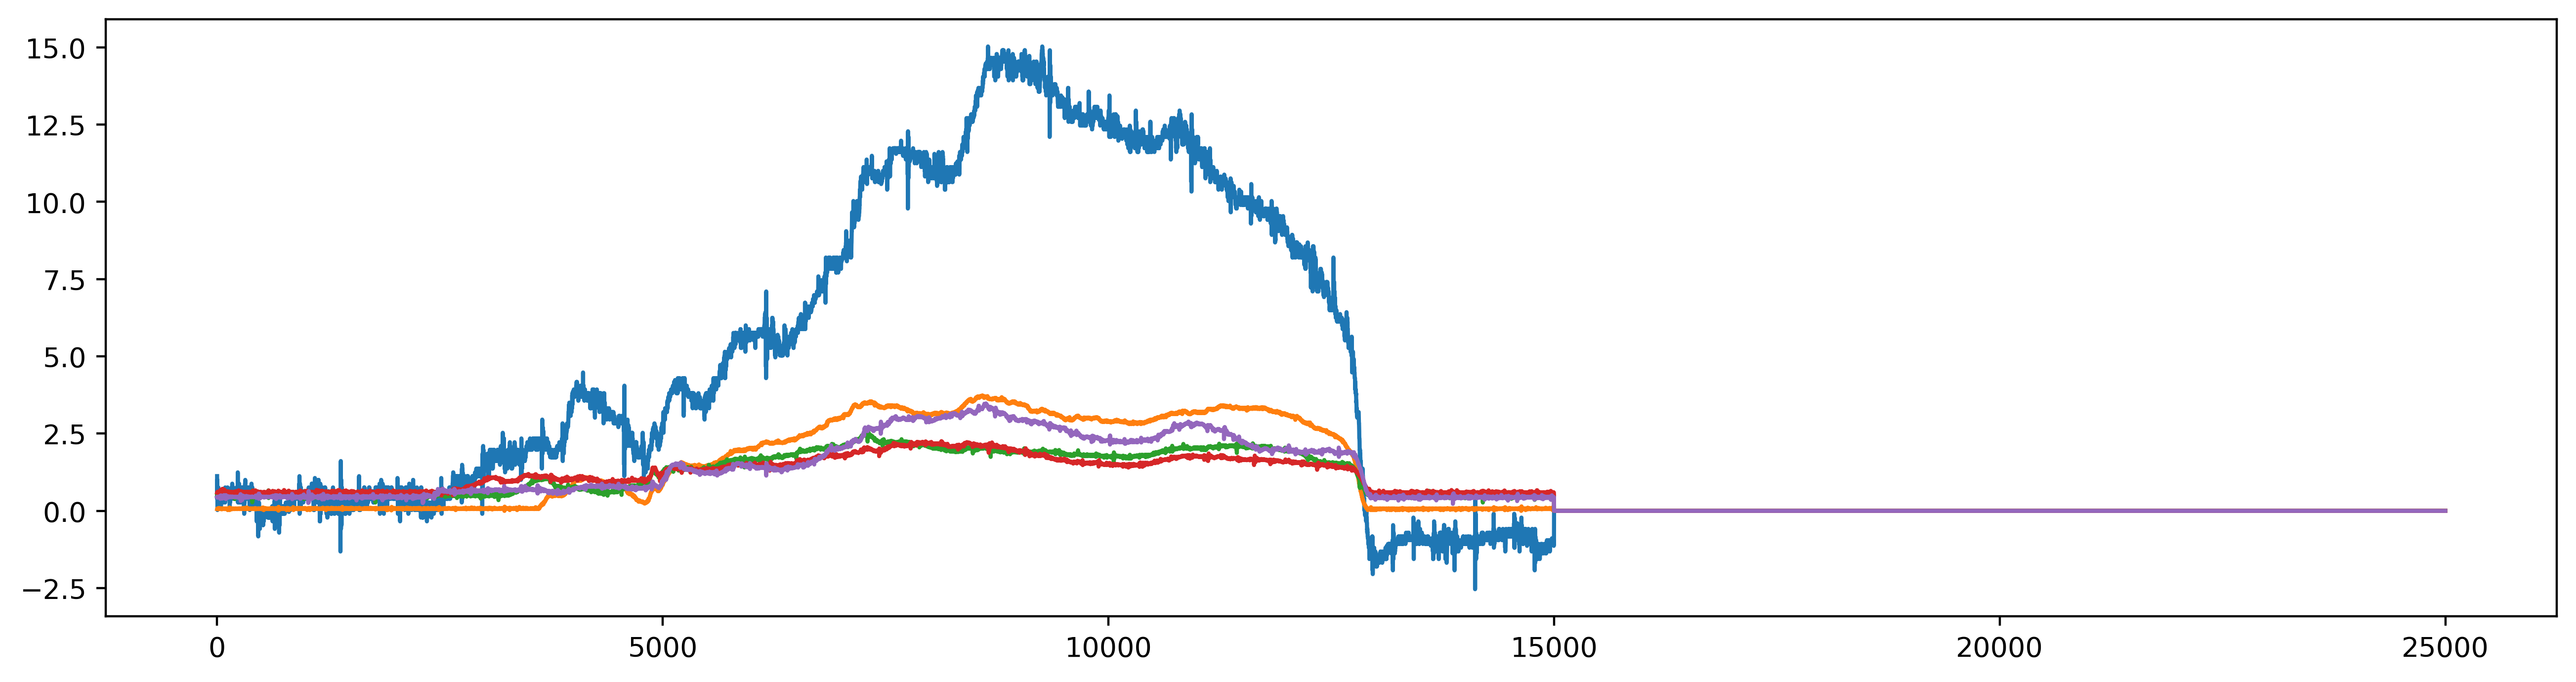

In [ ]:
temp = X[11]
temp = temp.reshape(25000,5)
ax = figure(1, figsize=(16, 4), dpi=400, facecolor='w', edgecolor='k')
ax = plt.plot(-temp)
temp = np.expand_dims(X[11],axis=0)

In [ ]:
model_fn = ('/content/Drive/My Drive/project/Build model/Channel/brick_drink_laomo.h5')
model = load_model(model_fn)
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 25000, 5)]        0         
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 25000, 4)          304       
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 25000, 4)          244       
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 1000, 4)           0         
_________________________________________________________________
conv1d_82 (Conv1D)           (None, 1000, 8)           232       
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 1000, 8)           456       
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 100, 8)            0  

dense_10 (32, 2)
conv1d_80 (15, 5, 4)
conv1d_81 (15, 4, 4)
conv1d_82 (7, 4, 8)
conv1d_83 (7, 8, 8)
conv1d_84 (5, 8, 16)
conv1d_85 (5, 16, 16)
conv1d_86 (3, 16, 32)
conv1d_87 (3, 32, 32)


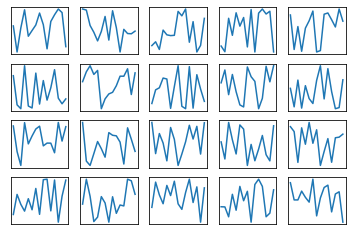

In [ ]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)
# summarize filters in each convolutional layer
from matplotlib import pyplot
# load the model
model = model
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
x=np.linspace(0,15,15,endpoint=False)
# plot first few filters
n_filters, ix = 4, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, i]
	# plot each channel separately
	for j in range(5):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 5, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.plot(x,np.array(f[:,j]))
		ix += 1
# show the figure
pyplot.show()

In [ ]:
j

4

In [ ]:
## Feature map

In [ ]:
model = load_model(model_fn)
model.summary()
print('number of layers: ',len(model.layers))
print('layers: ')
model.layers

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 25000, 5)]        0         
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 25000, 4)          304       
_________________________________________________________________
conv1d_81 (Conv1D)           (None, 25000, 4)          244       
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 1000, 4)           0         
_________________________________________________________________
conv1d_82 (Conv1D)           (None, 1000, 8)           232       
_________________________________________________________________
conv1d_83 (Conv1D)           (None, 1000, 8)           456       
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 100, 8)            0  

for i in range(len(model.layers)):
    model = load_model(model_fn)
    model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[i].output)
    feature_maps = model.predict(temp)
    ix=1
    ax=figure(num=i, figsize=(16, 4), dpi=400, facecolor='w', edgecolor='k')
    for _ in range(feature_maps.shape[2]):
        ax=plt.subplot(1,feature_maps.shape[2],ix)
        ax.set_xticks([])
        ax.set_yticks([])
#         t = np.linspace(0, 25, 25000)
        plt.plot(feature_maps[0, :, ix-1])
        ix += 1
    plt.show()

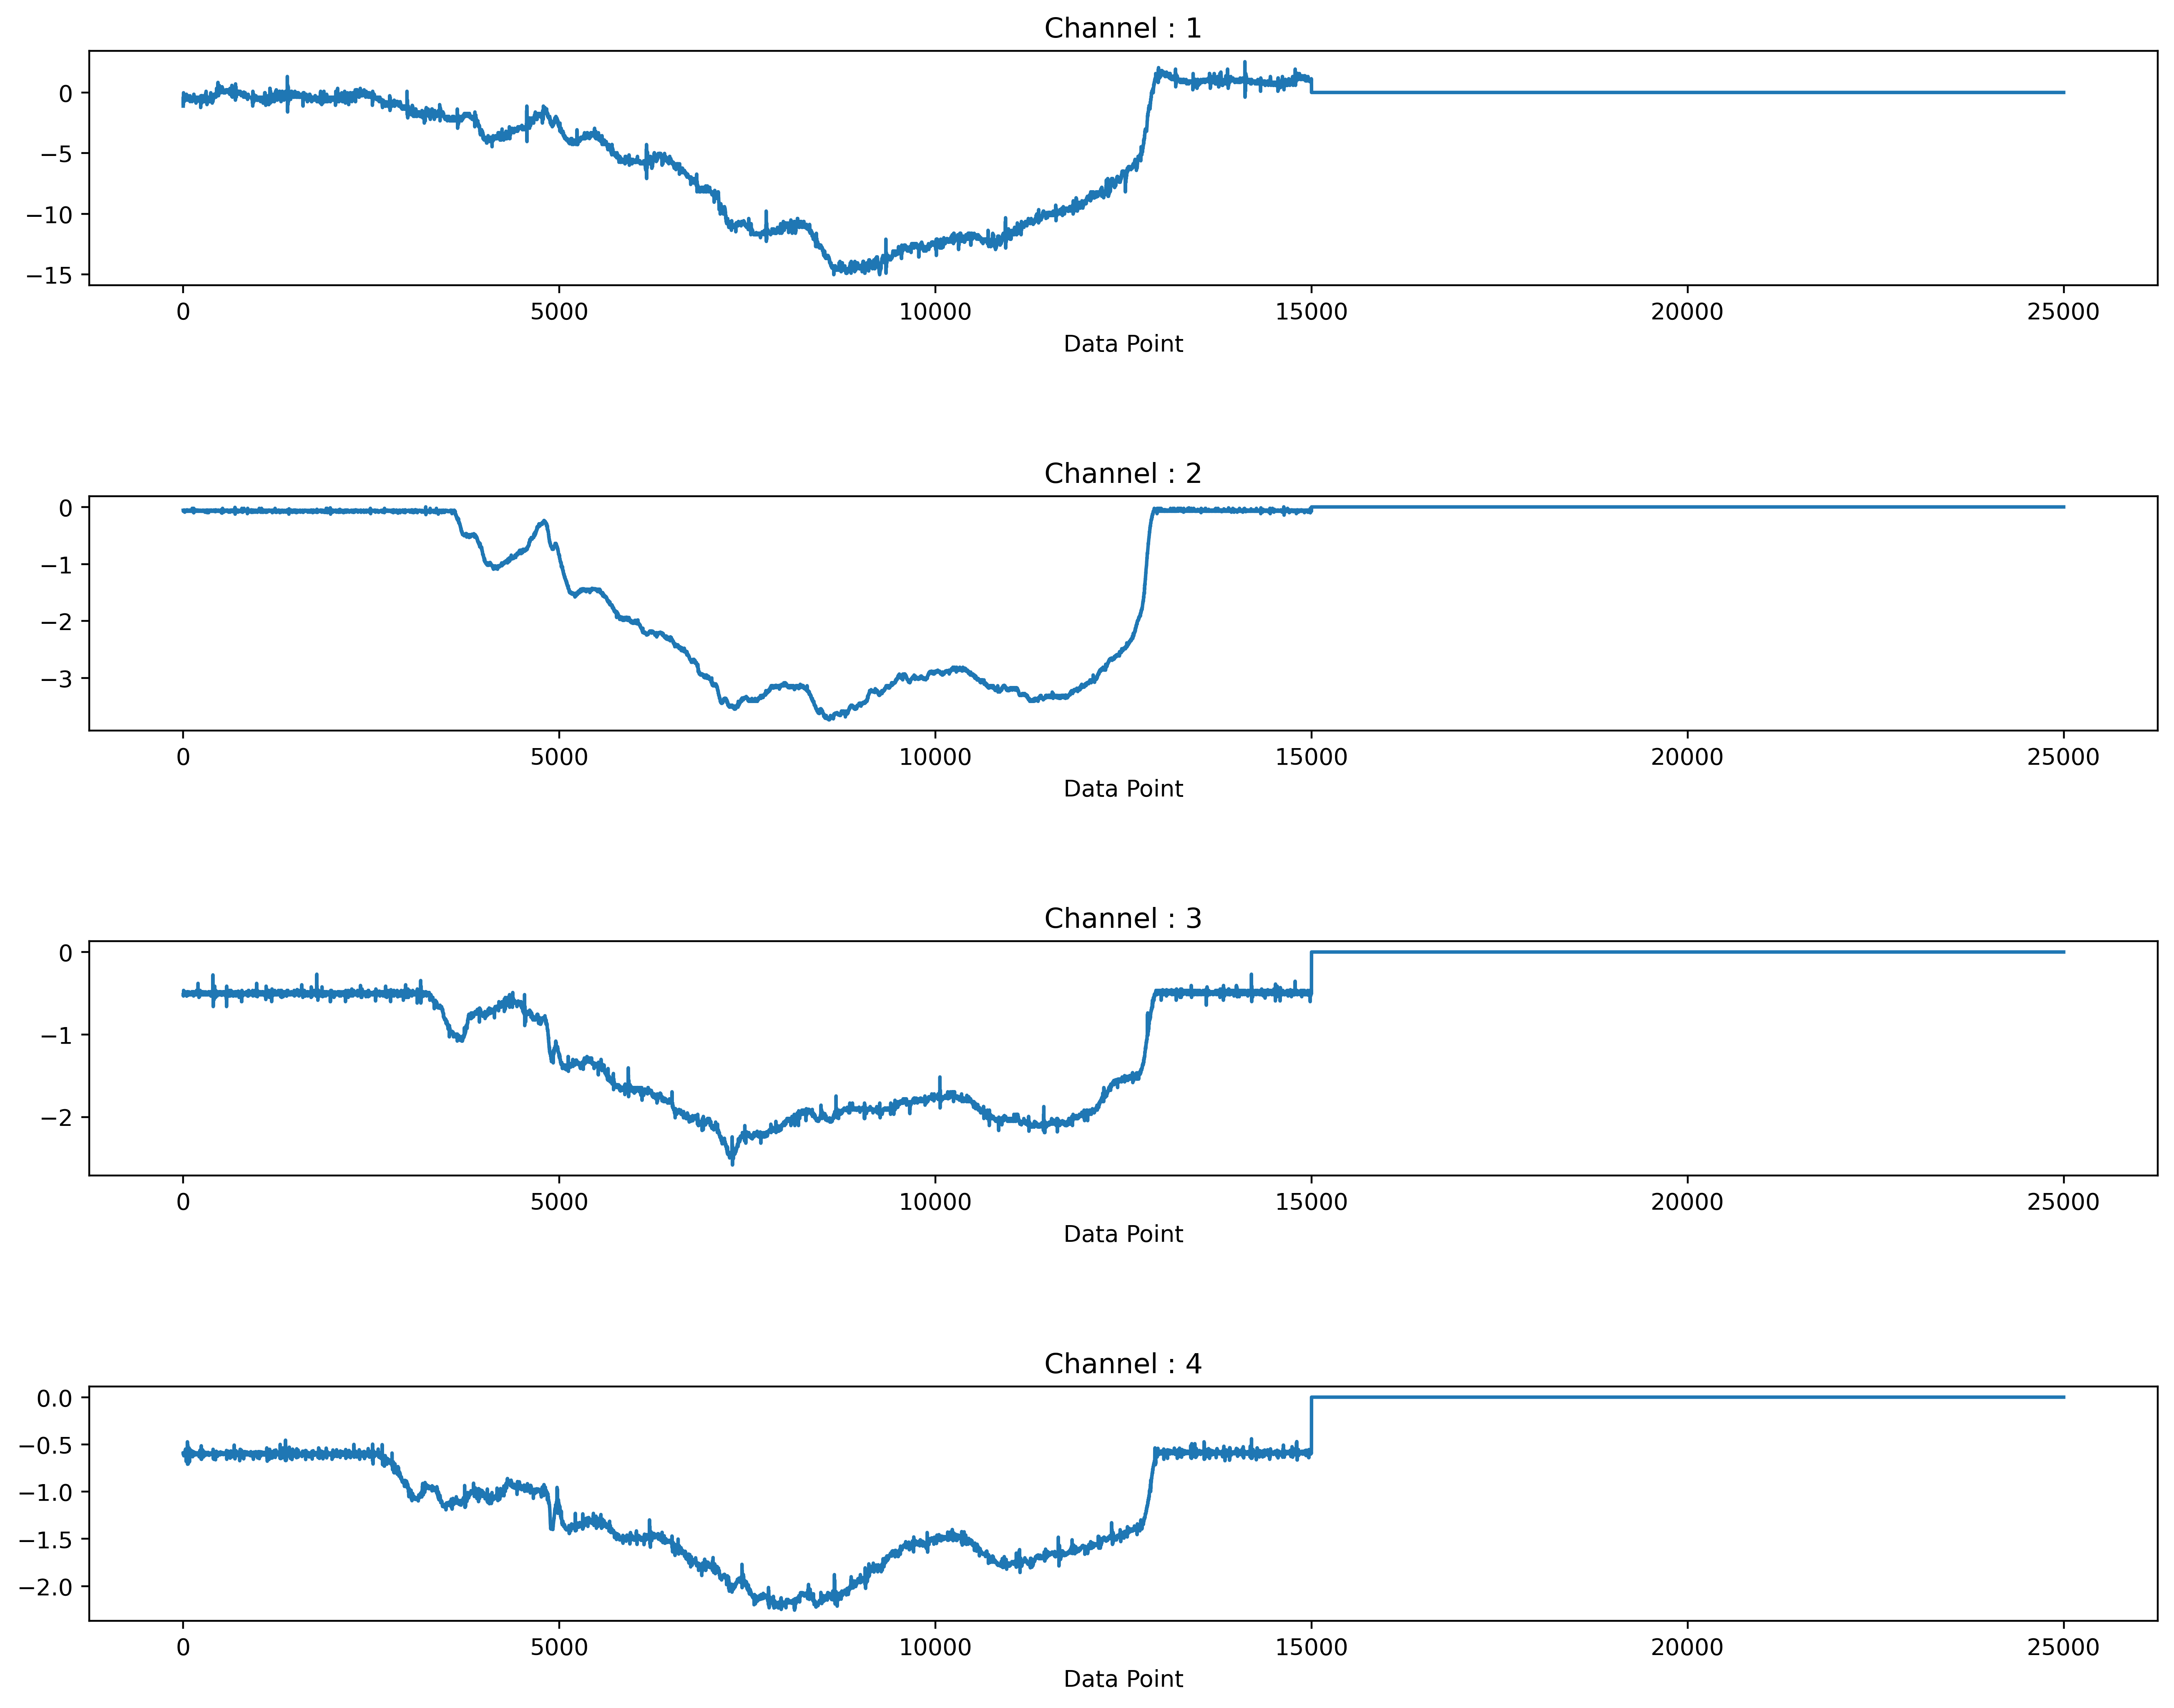

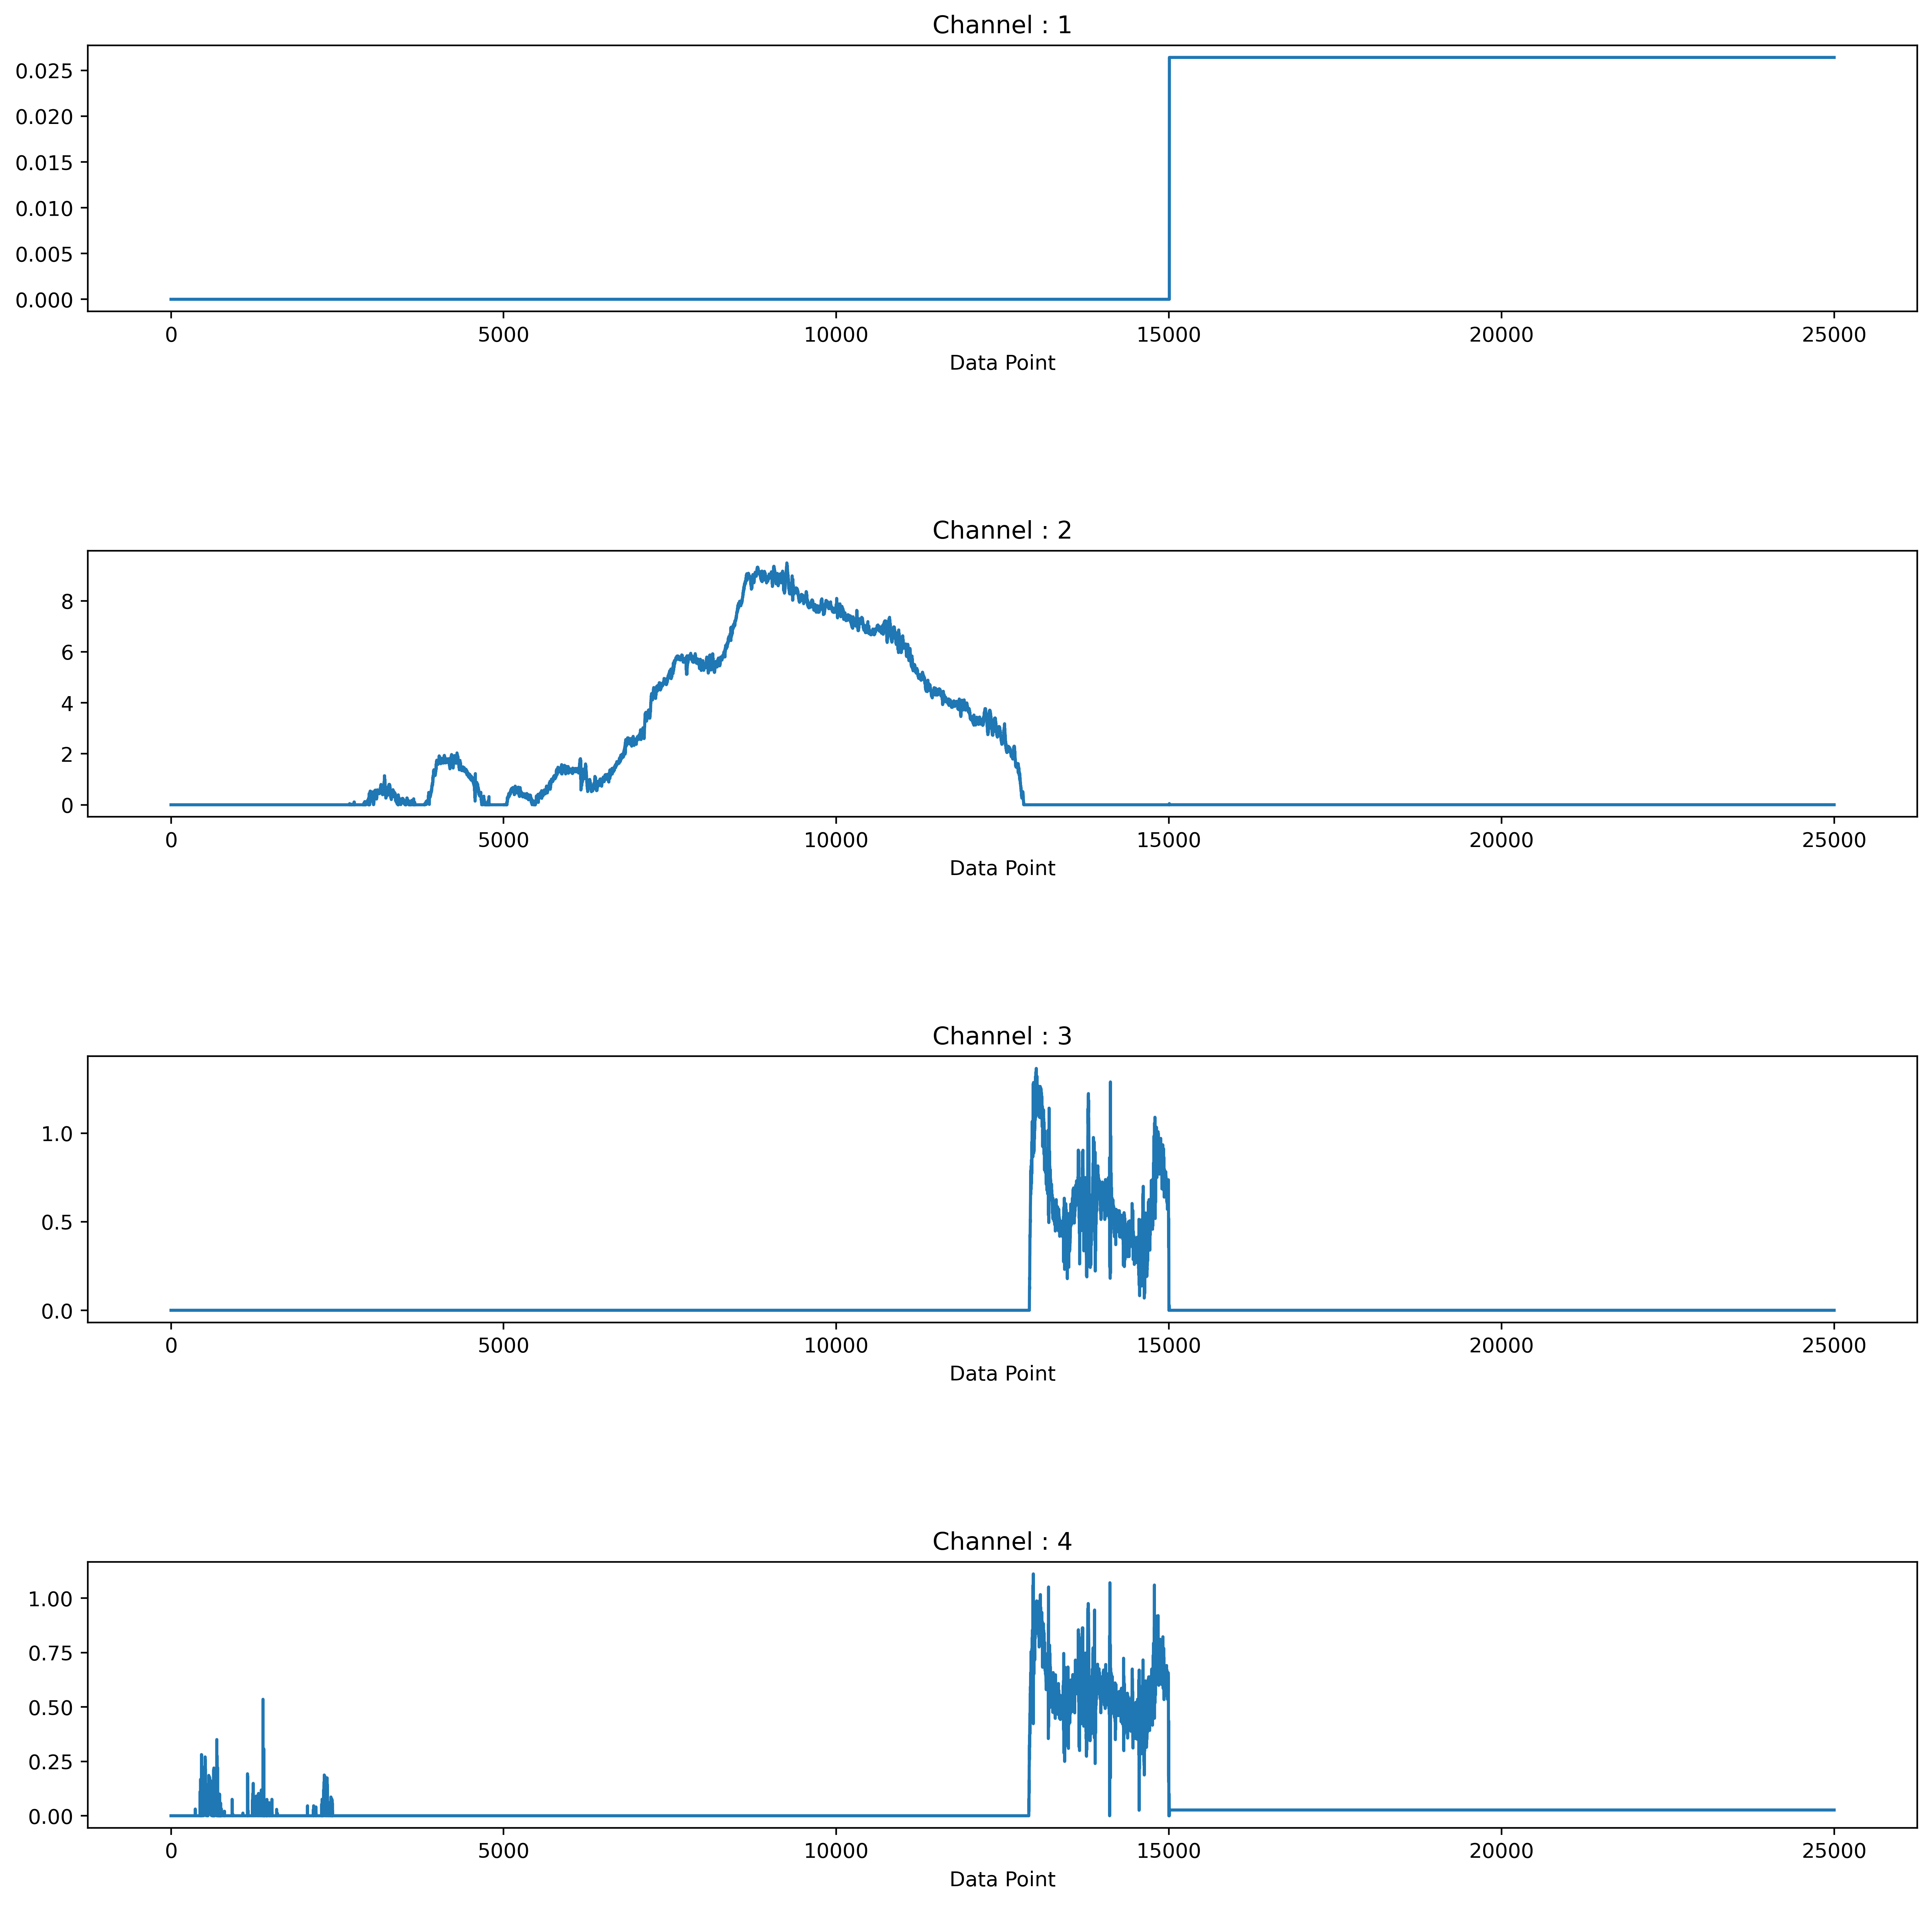

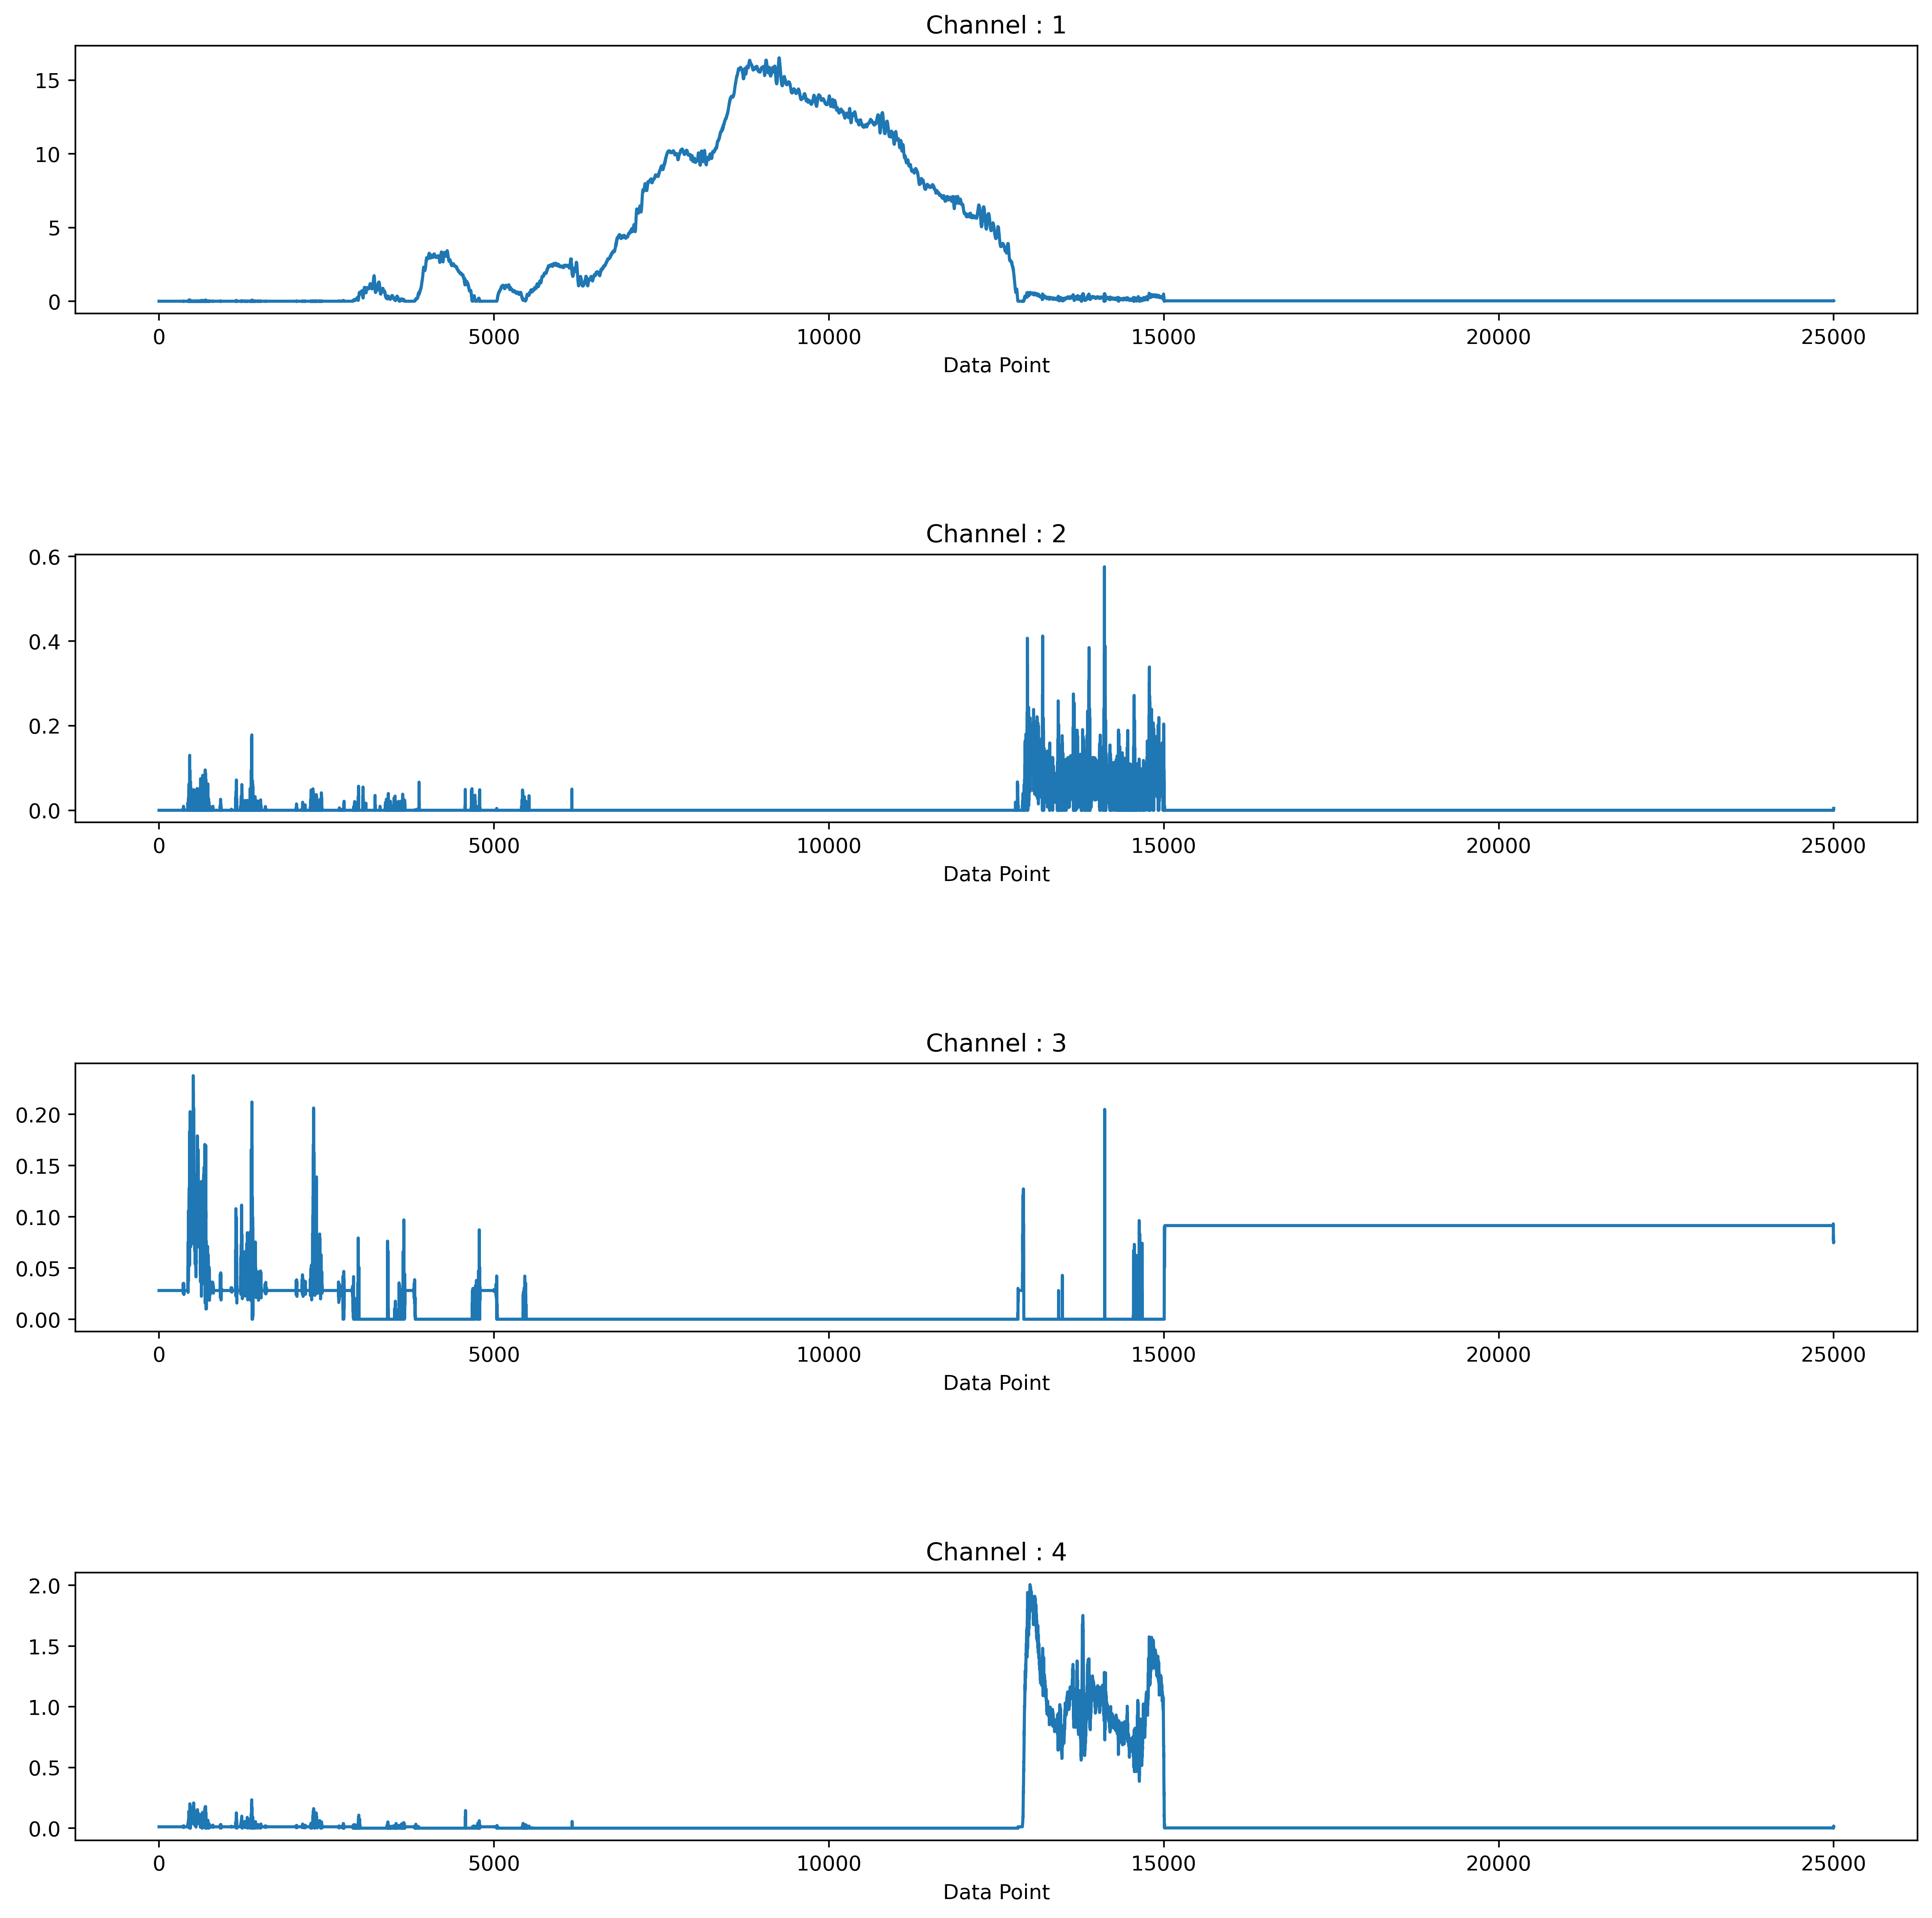

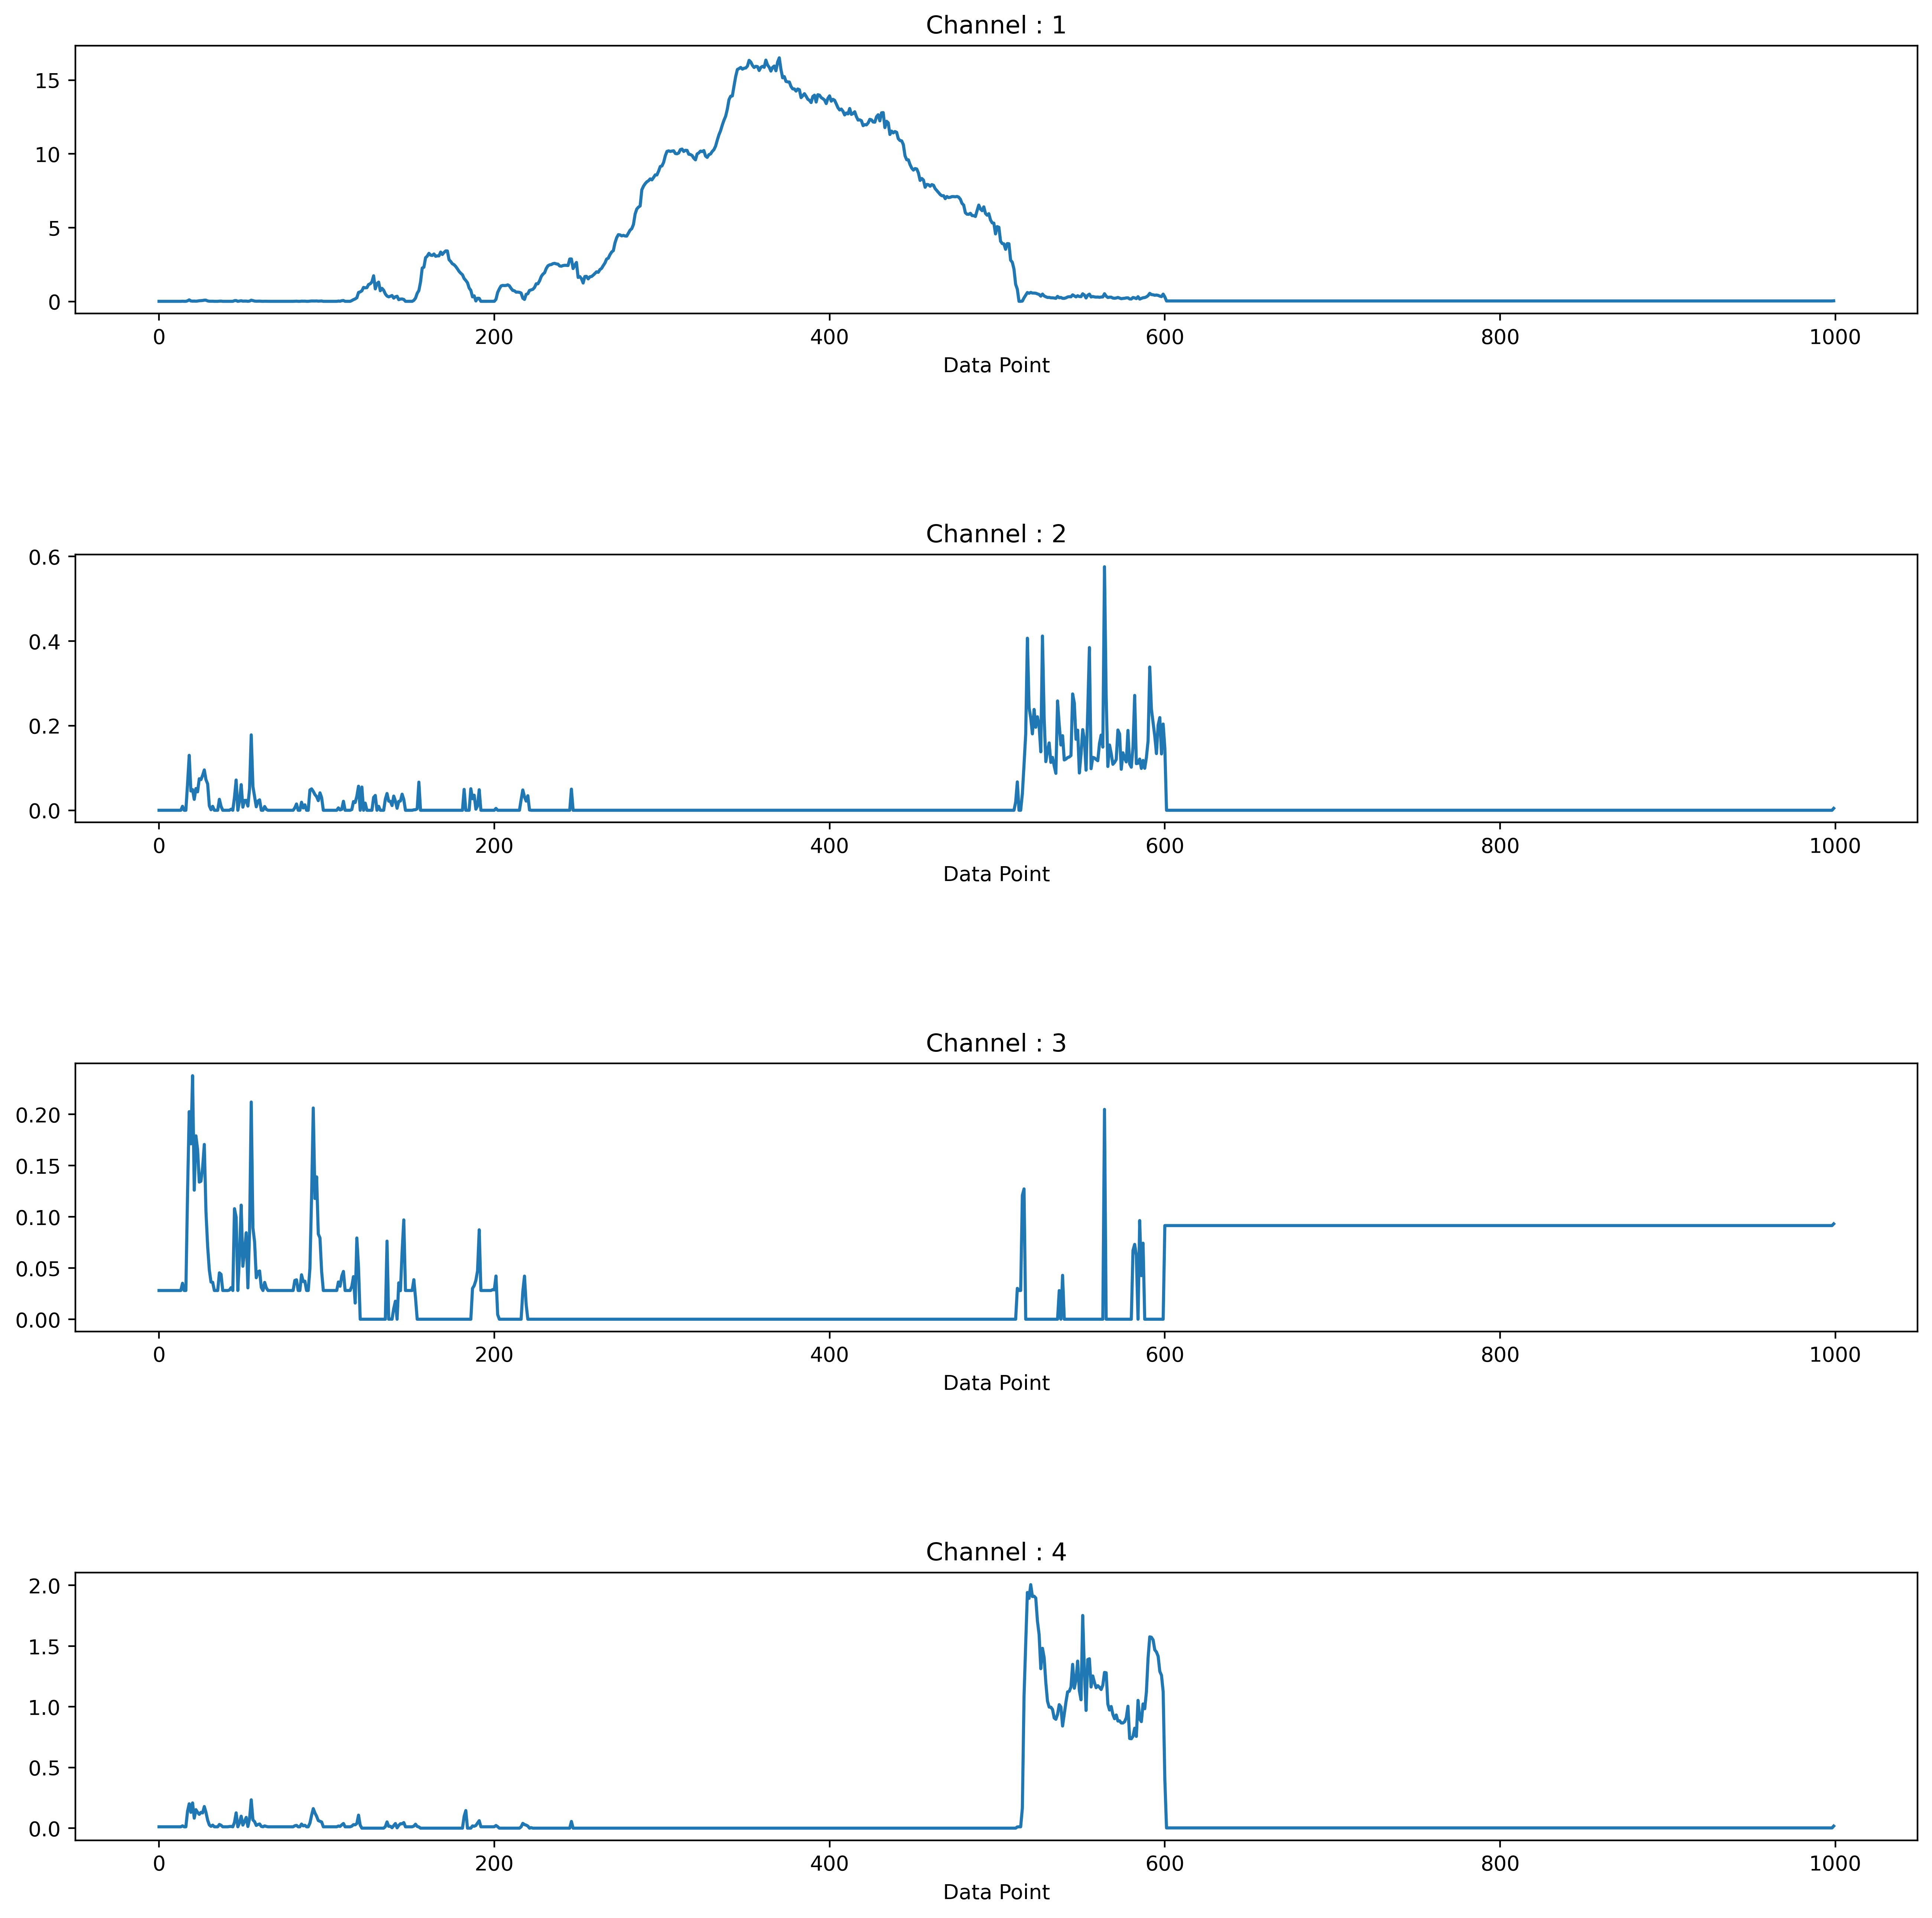

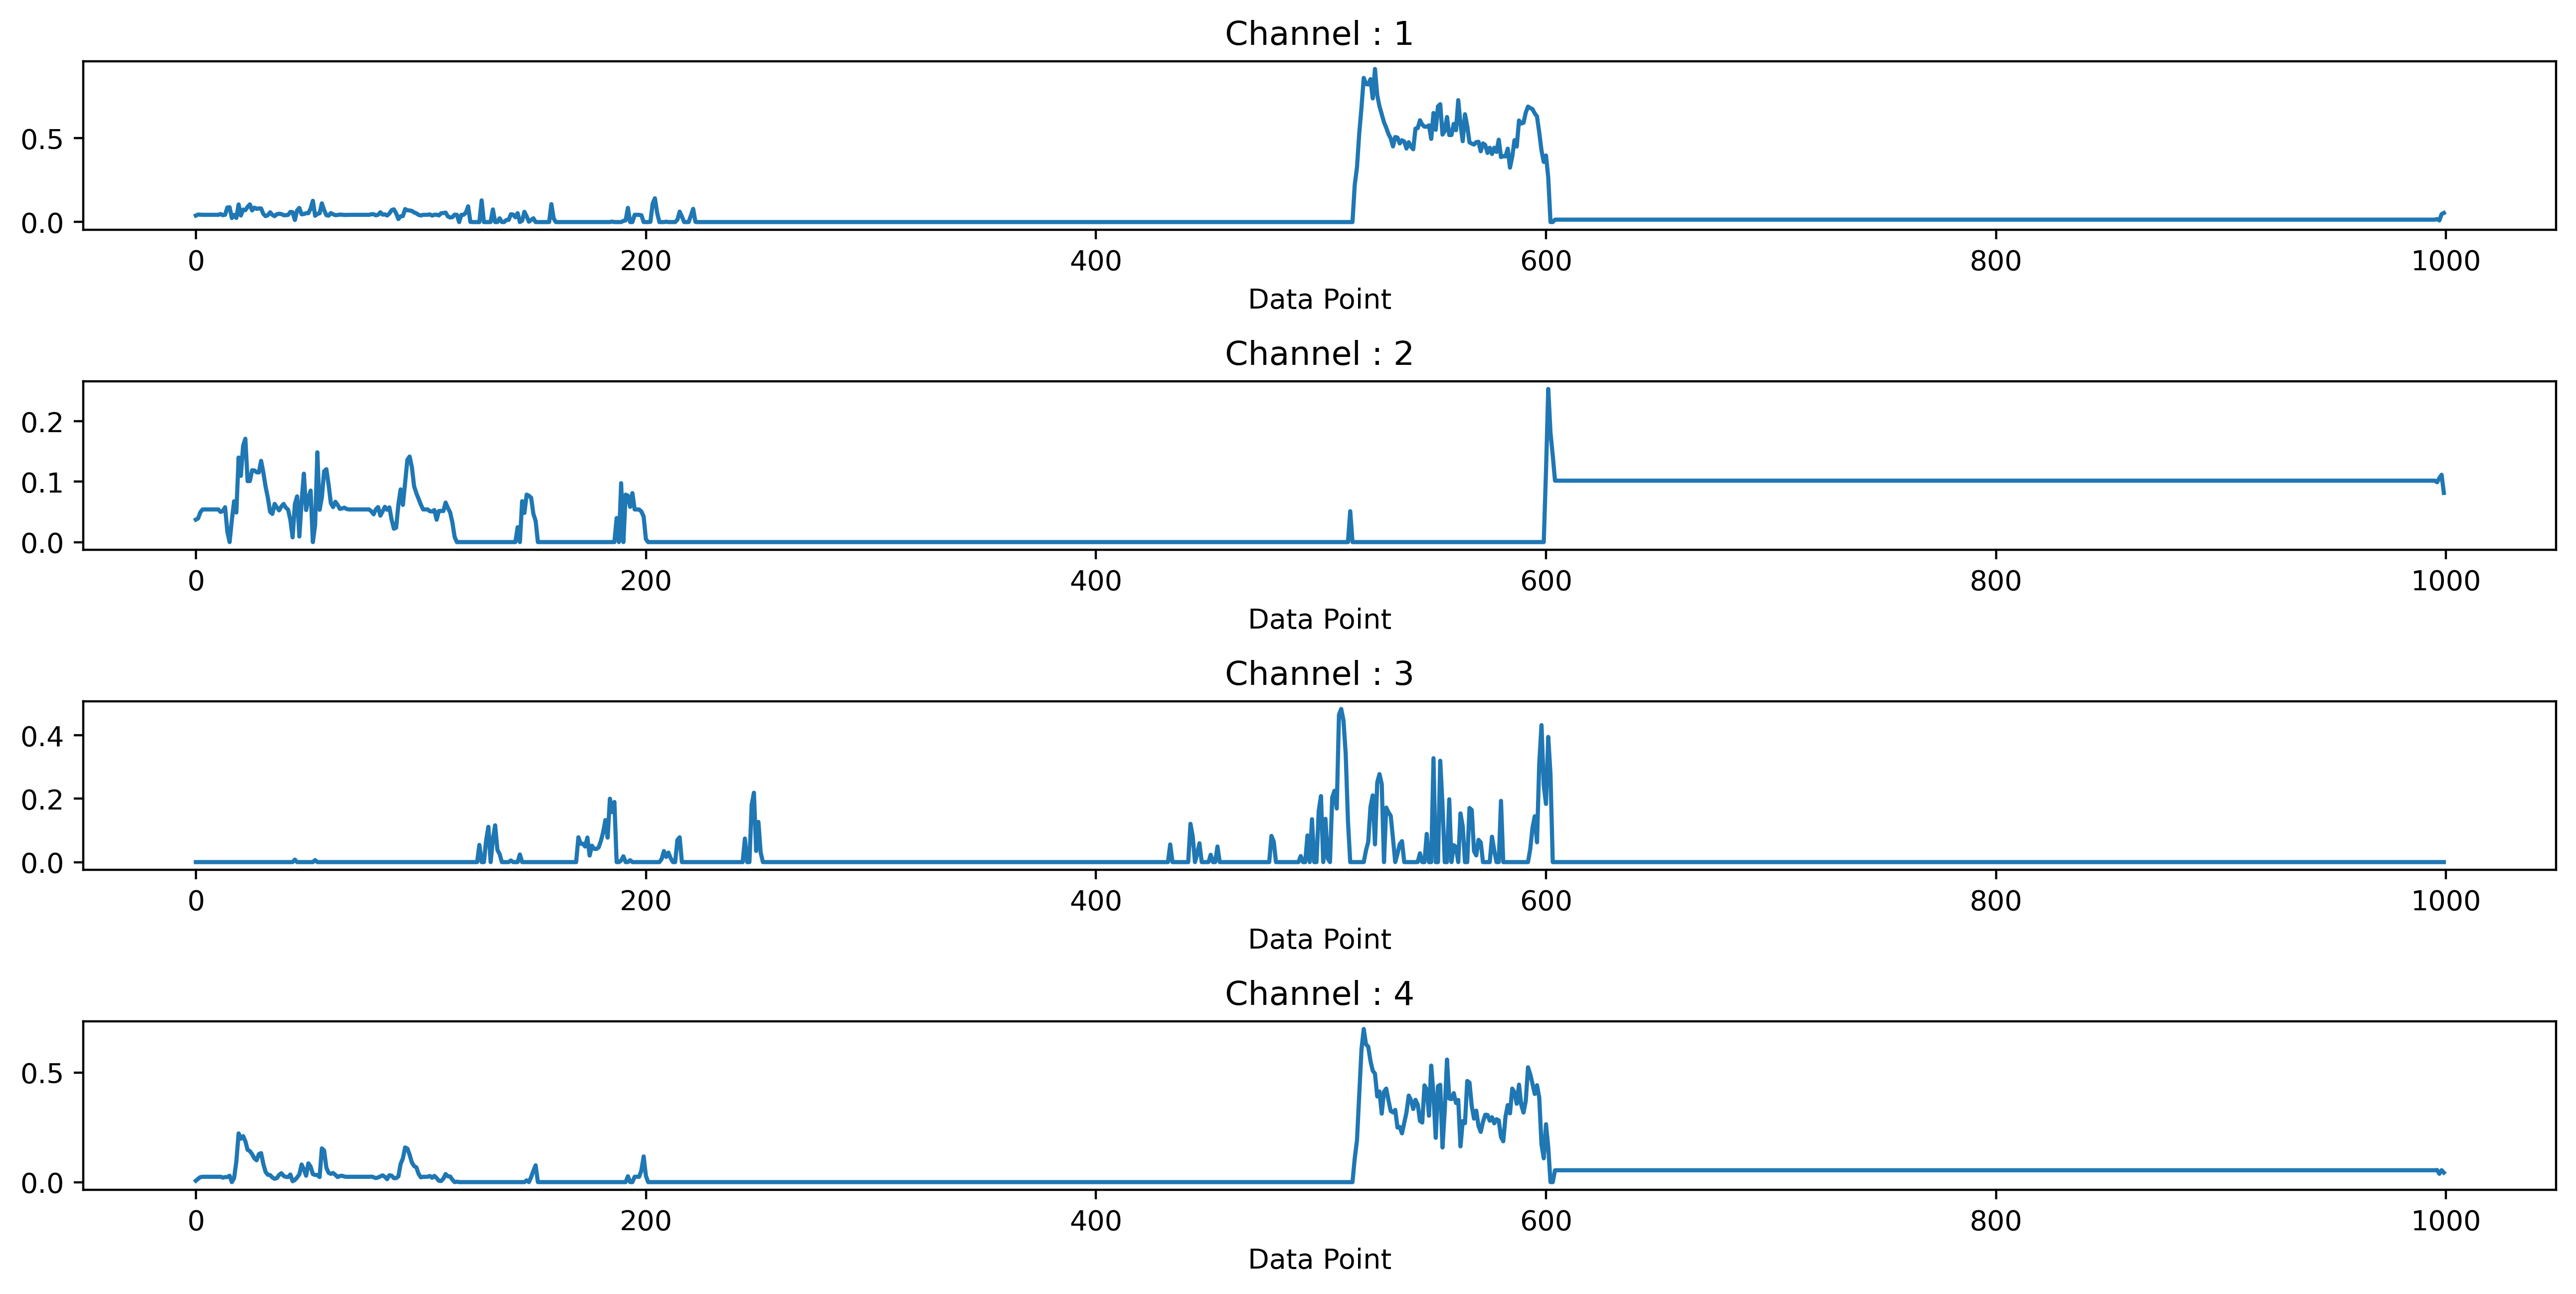

In [ ]:
layer = [0,1, 2,3,4]
cnn = load_model(model_fn)
for i in layer:
    model = tf.keras.models.Model(inputs=cnn.inputs, outputs=cnn.layers[i].output)
    feature_maps = model.predict(temp)
    ix=1
    ax=figure(num=i, figsize=(16, 16), dpi=400, facecolor='w', edgecolor='k')
    for _ in range(4):
        ax=plt.subplot(feature_maps.shape[2], 1,ix)
        plt.subplots_adjust(wspace = 0.6, hspace = 0.9)
        ax.set_xlabel('Data Point')
        ax.set_title('Channel : '+str(_+1))
        t = np.linspace(0, 25, 25000)
        x=feature_maps[0, :, ix-1]
        plt.plot(x)
        ix += 1
    plt.show()

AttributeError: 'list' object has no attribute 'set_title'

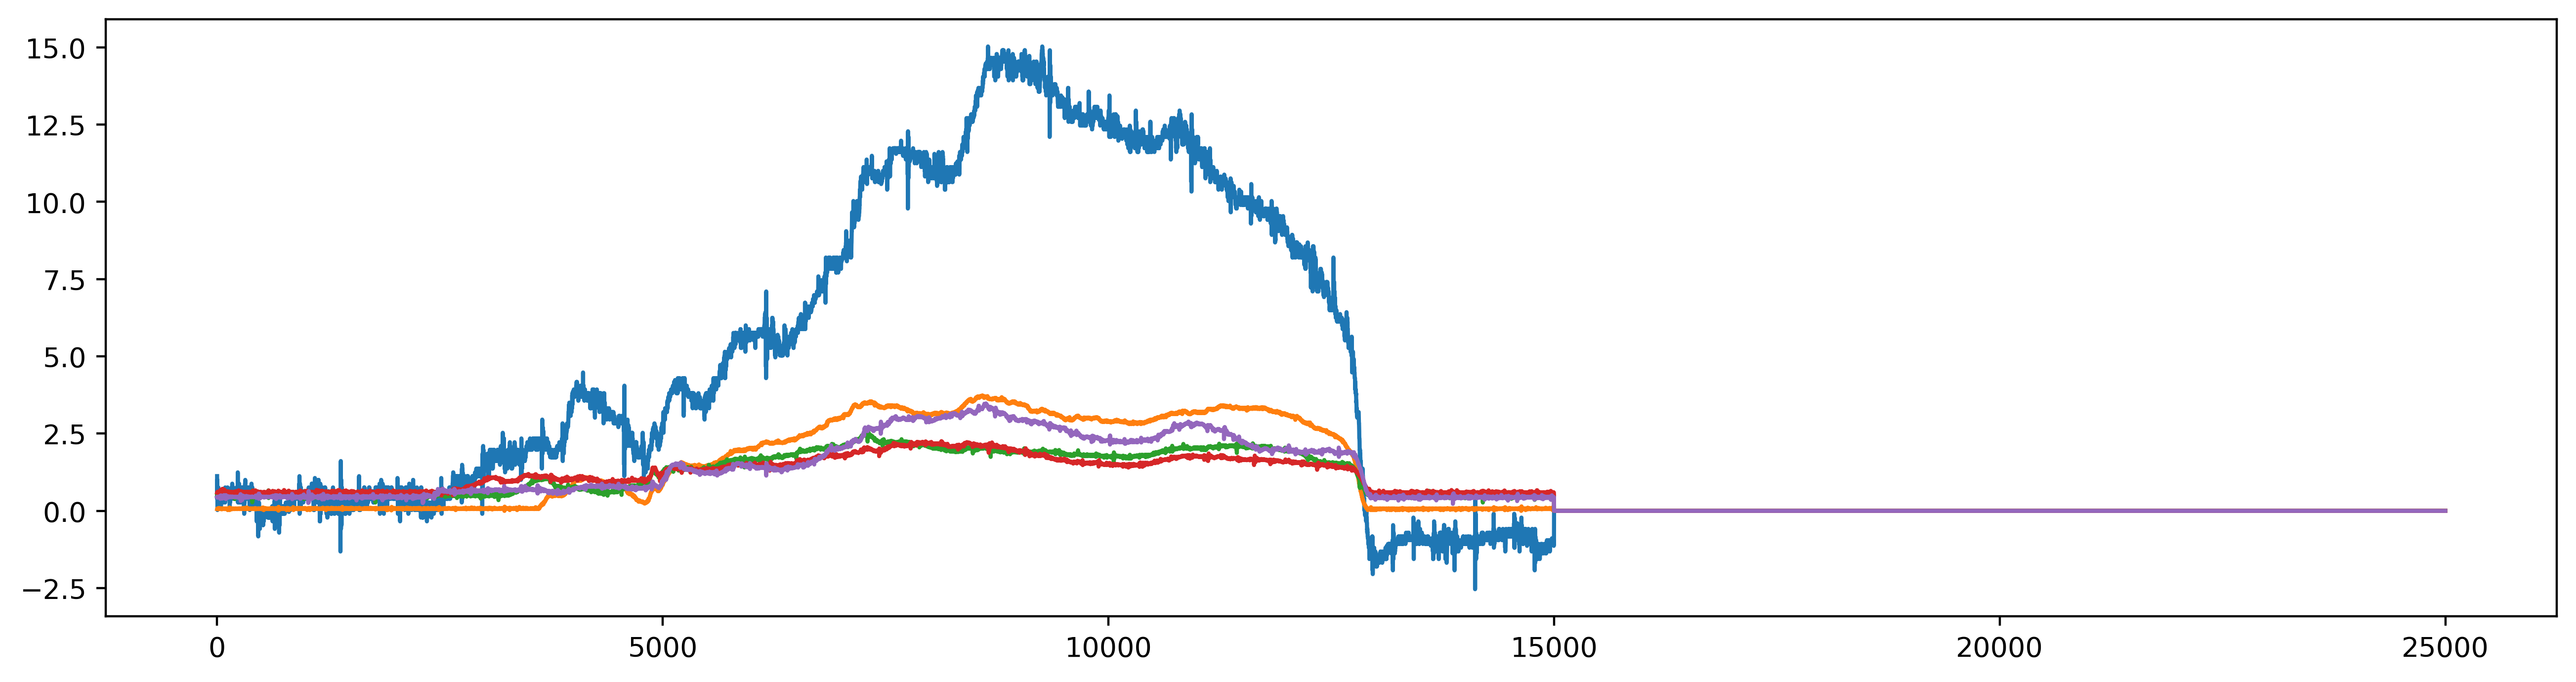

In [ ]:
temp=X[11]
temp=temp.reshape(25000,5)
ax=figure(1, figsize=(16, 4), dpi=400, facecolor='w', edgecolor='k')
ax=plt.plot(-temp)
ax.set_title('8 input channels')
temp=np.expand_dims(X[11],axis=0)

In [ ]:
len(model.layers)

In [ ]:
feature_maps.shape[2]